In [209]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

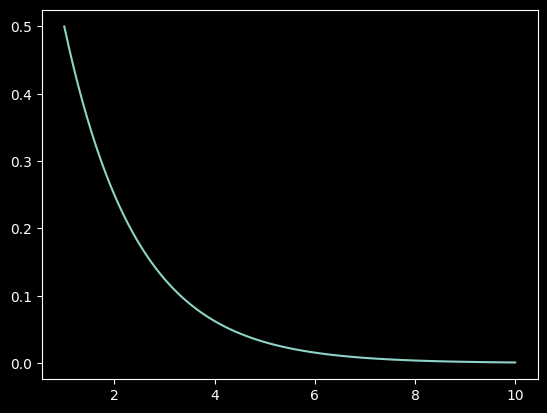

In [210]:
# -w = q^i => q = (0, 1)
dots = np.linspace(1, 10, 100)
q = 0.5
value = list(map(lambda x: q**x, dots))

plt.plot(dots,  value)
plt.show()

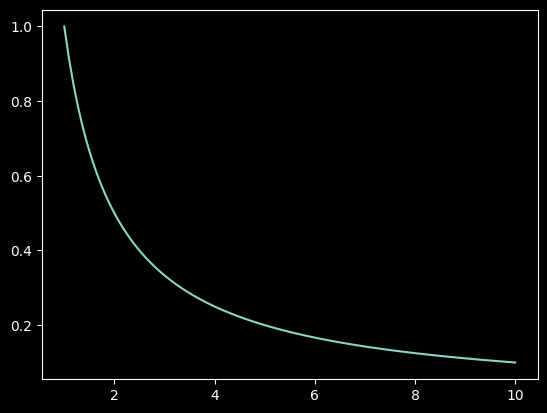

In [211]:
# -w = 1/i
dots = np.linspace(1, 10, 100)
value = list(map(lambda x: 1/x, dots))
plt.plot(dots, value)
plt.show()

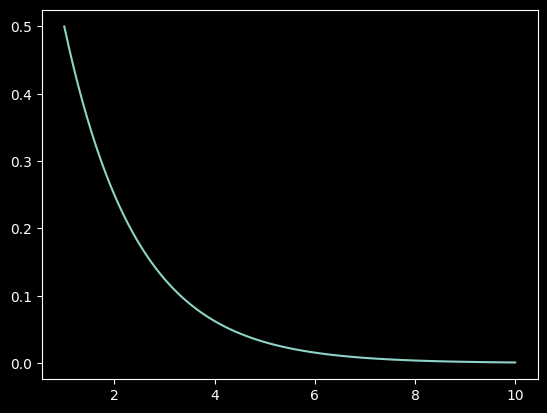

In [212]:
# -w = q^d, q = (0, 1)
dots = np.linspace(1, 10, 100)
q = 0.5
value = list(map(lambda d: q**d, dots))
plt.plot(dots, value)
plt.show()

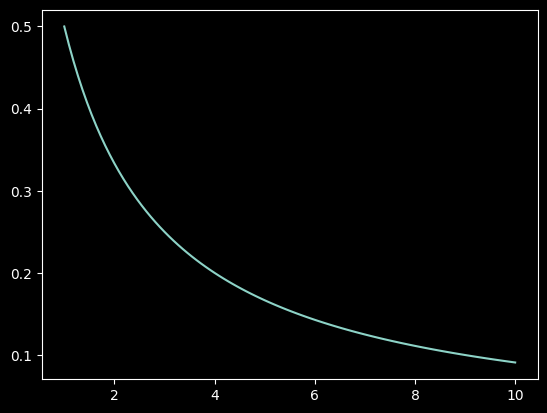

In [213]:
# -w = 1 / (d + a)

dots = np.linspace(1, 10, 100)
a = 1
value = list(map(lambda d: 1 / (d + a), dots))
plt.plot(dots, value)
plt.show()

In [214]:
# Algorithm KNN
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

In [215]:
X, y = load_iris(return_X_y=True)

X = X[:, :2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

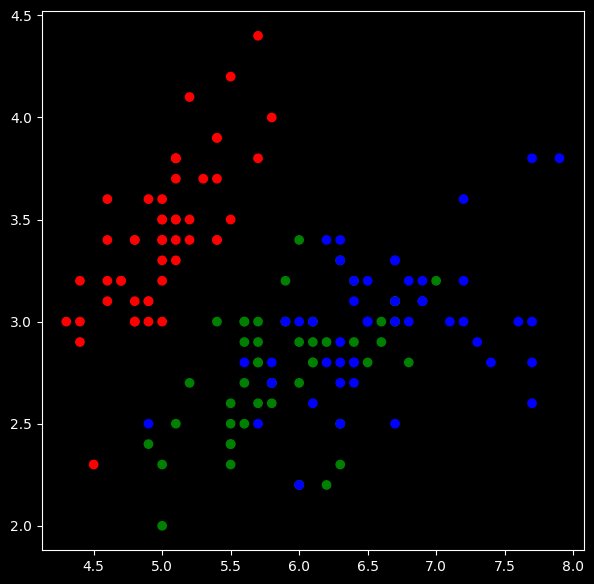

In [217]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

In [218]:
# euclidean metric
def e_metrics(x1, x2):
    distance = sum(np.square(x1 - x2))
    return distance

In [219]:
{class_item: 0 for class_item in set(y_train)}

{0: 0, 1: 0, 2: 0}

In [220]:
def knn(x_train, y_train, x_test, k):
    answers = []
    for j, x in enumerate(x_test):
        test_distances = []

        for i in range(len(x_train)):
            # distance for every x_test ==> in x_train
            distance = e_metrics(x, x_train[i])

            test_distances.append((distance, y_train[i]))

        classes = {class_item: 0 for class_item in set(y_train)}

        # sort distances and get best number k of frequency
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        answers.append(sorted(classes, key=classes.get)[-1])

    return answers

In [221]:
y_pred = knn(X_train, y_train, X_test, 5)

In [222]:
def accuracy(pred, y):
    print((sum(pred == y) / len(y)))

In [223]:
accuracy(y_pred, y_test)

0.7333333333333333


In [224]:
k = 2

In [225]:
# Graph of classes
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # limits graph
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # print(np.c_[xx.ravel(), yy.ravel()].shape)

    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    Z = np.array(Z).reshape(xx.shape)

    plt.figure(figsize=(7, 7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Classification k = {k}")
    plt.show()

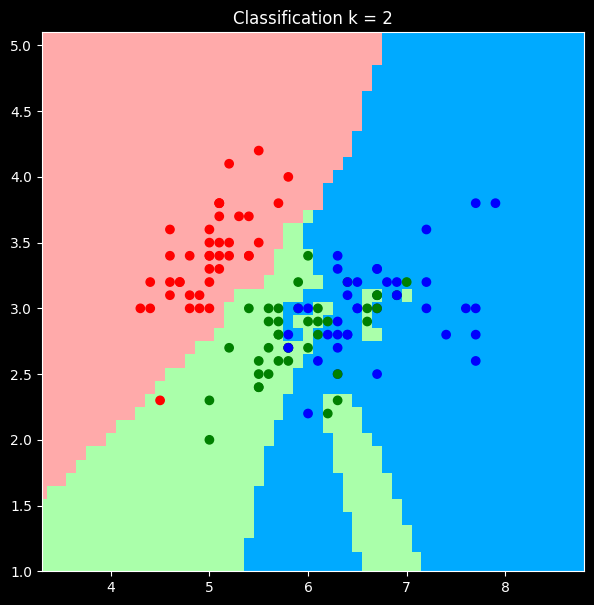

In [226]:
get_graph(X_train, y_train, k)

In [227]:
accuracy(y_pred, y_test)

0.7333333333333333


0.7333333333333333


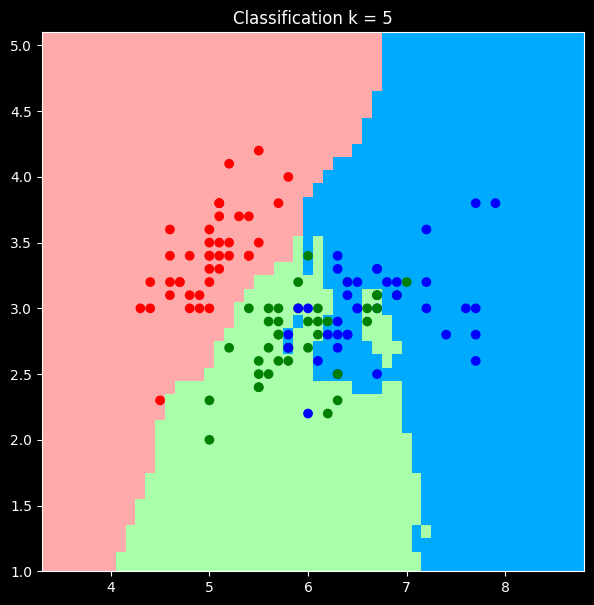

In [228]:
k = 5
y_pred = knn(X_train, y_train, X_test, k)
accuracy(y_pred, y_test)
get_graph(X_train, y_train, k)

0.7666666666666667


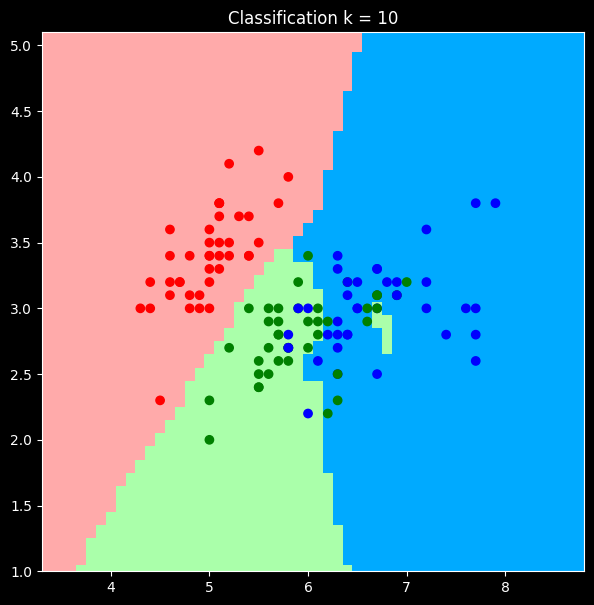

In [229]:
k = 10
y_pred = knn(X_train, y_train, X_test, k)
accuracy(y_pred, y_test)
get_graph(X_train, y_train, k)